# DAMG7250-Spring 2022 | Group07 | NYC Tree Plantation

Notebook for data visualization sourcing data from Neo4j graph database using python module neo4j and Matplotlib library.

# Prerequisite
1. Install relevant python library
2. Connection String URL, user and password for the Neo4j database

# Outcome
Graphic representation of data from Neo4j database and observing and inferring conclusion. 


---

# Lets gets started ...







# Install and import the prerequisite Python Libraries


In [1]:
# ! pip install py2neo
# ! pip install patchworklib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from py2neo import Graph,Node,Relationship
import patchworklib as pw
%matplotlib inline

# Connecting local neo4j database


> URL: bolt://localhost:7687<br>
> user: neo4j<br>
> password: admin<br>

```python
graph = Graph("<URL>",auth=("<user>","<password>"))
```

In [3]:
# Neo4j connection String

# GCP Instance
# uri = "neo4j://34.139.42.191:7687"
# user = "neo4j"
# password = "yp4PxpWB"

# Localhost Instance
uri="bolt://localhost:7687"
user="neo4j"
password="admin"
graphdb = Graph("bolt://localhost:7687", auth=("neo4j","admin"))

# graphdb = Graph("neo4j://34.139.42.191:7687", auth=("neo4j", "yp4PxpWB"))

# Data Extraction into Dataframe for Visualization and functions

In [4]:
def viz_1():
    query = "MATCH(a:Area) RETURN Count(a)"
    area_count = graphdb.evaluate(query)
    query = "MATCH(b:Jurisdiction) RETURN Count(b)"
    jurisdiction_count = graphdb.evaluate(query)
    df_result_count = pd.Series({"Area": area_count, "Jurisdiction": jurisdiction_count})
    df_result_count.plot(kind="bar", color=["blue", "darkorange"])
    plt.xlabel("Node Label")
    plt.ylabel("No of Nodes")
    plt.xticks(rotation=45)
    plt.title('')


def viz_2():
    query = "MATCH (locality:Locality)<-[rel:IN]-(plantingspace:PlantingSpace) RETURN DISTINCT locality.name as LocalityName, plantingspace.id as PlantingSpaceID, plantingspace.latitude as PlantingSpaceLatitude, plantingspace.longitude as PlantingSpaceLongitude"
    df = graphdb.run(query).to_data_frame()
    df = df.groupby('LocalityName').agg('count').reset_index()
    df.drop(index=3, inplace=True)

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
    sns.barplot(x='LocalityName', y='PlantingSpaceID', data=df, ax=ax1)
    ax1.set_title('Number of Plantings by LocalityName', fontsize=15)
    ax1.set_xlabel('LocalityName', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='both', labelsize=10)
    plt.xticks(rotation=45)


def viz_3():
    query = "MATCH (locality:Locality)<-[rel:IN]-(plantingspace:PlantingSpace) RETURN DISTINCT locality.name as LocalityName, plantingspace.id as PlantingSpaceID, plantingspace.latitude as PlantingSpaceLatitude, plantingspace.longitude as PlantingSpaceLongitude"
    df = graphdb.run(query).to_data_frame()
    df['Latitude'] = pd.to_numeric(df['PlantingSpaceLatitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['PlantingSpaceLongitude'], errors='coerce')
    df.drop(df.index[df['LocalityName'] == 'Not Available'], inplace=True)

    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='Longitude', y='Latitude', hue='LocalityName', s=20, data=df)


def viz_4():
    query = "MATCH (plantingspace:PlantingSpace)-[rel:UNDER]->(area:Area) RETURN DISTINCT plantingspace.id as PlantingSpaceID, area.NTA as AreaNTA"
    df = graphdb.run(query).to_data_frame()
    df = df.groupby('AreaNTA').agg('count').reset_index()
    df.sort_values(by=['PlantingSpaceID'], inplace=True, ascending=False)
    df.drop(index=122, inplace=True)
    top5 = df.head(5)

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
    sns.barplot(x='AreaNTA', y='PlantingSpaceID', data=top5, ax=ax1)
    ax1.set_title('Number of Plantings by NTA', fontsize=15)
    ax1.set_xlabel('NTA', fontsize=10)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='both', labelsize=10)
    plt.xticks(rotation=90)


def viz_5():
    # query= " MATCH (inspection:Inspection)-[rel:CARRIED_ON]->(plantingspace:PlantingSpace) RETURN DISTINCT inspection.id as GlobalID1, createdmonth.month as CreatedMonth "
    # df1 = graphdb.run(query).to_data_frame()
    # query= " MATCH (inspection:Inspection)-[rel:CARRIED_ON]->(createdyear:CreatedYear) RETURN DISTINCT inspection.id as GlobalID, createdyear.year as CreatedYear "
    # df2 = graphdb.run(query).to_data_frame()
    # df = pd.concat([df1, df2], axis=1, join="inner")
    # df = df.groupby('CreatedYear').agg('count').reset_index()
    # df.drop("CreatedMonth", axis=1, inplace=True)
    # df.drop("GlobalID1", axis=1, inplace=True)

    query = " MATCH (inspection:Inspection) RETURN DISTINCT inspection.id as GlobalID, inspection.createdyear as CreatedYear"
    df = graphdb.run(query).to_data_frame()
    df.drop(df.index[df['CreatedYear'] == 'Not Available'], inplace=True)
    df['CreatedYear'] = pd.to_numeric(df['CreatedYear'])
    df = df.groupby('CreatedYear').agg('count').reset_index()

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
    sns.barplot(x='CreatedYear', y='GlobalID', data=df, ax=ax1)
    ax1.set_title('Number of Plantings by Year', fontsize=15)
    ax1.set_xlabel('Years', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='both', labelsize=10)


def viz_6():
    query = " MATCH (inspection:Inspection) RETURN DISTINCT inspection.id as GlobalID, inspection.createdmonth as CreatedMonth"
    df = graphdb.run(query).to_data_frame()
    df.drop(df.index[df['CreatedMonth'] == 'Not Available'], inplace=True)
    df['CreatedMonth'] = pd.to_numeric(df['CreatedMonth'])
    df = df.groupby('CreatedMonth').agg('count').reset_index()
    df.sort_values(by=['CreatedMonth'], inplace=True, ascending=True)

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
    sns.barplot(x='CreatedMonth', y='GlobalID', data=df, ax=ax1)
    ax1.set_title('Number of Plantings by Month', fontsize=15)
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='both', labelsize=10)


def viz_7():
    query = "MATCH (locality:Locality)<-[rel:IN]-(plantingspace:PlantingSpace) RETURN DISTINCT locality.name as LocalityName, plantingspace.id as PlantingSpaceID, plantingspace.latitude as PlantingSpaceLatitude, plantingspace.longitude as PlantingSpaceLongitude"
    df1 = graphdb.run(query).to_data_frame()
    query = "MATCH (locality:Locality)-[rel:HAS]->(address:Address) RETURN DISTINCT locality.name as LocalityName, address.street as StreetName"
    df2 = graphdb.run(query).to_data_frame()
    df = pd.concat([df1, df2], axis=1, join="inner")
    df.drop(df.index[df['StreetName'] == 'Not Available'], inplace=True)
    df = df.groupby('StreetName').agg('count').reset_index()
    df.drop("PlantingSpaceLongitude", axis=1, inplace=True)
    df.drop("PlantingSpaceLatitude", axis=1, inplace=True)
    # df.drop("Longitude", axis=1, inplace=True)
    # df.drop("Latitude", axis=1, inplace=True)
    df.drop("LocalityName", axis=1, inplace=True)
    df.sort_values(by=['PlantingSpaceID'], inplace=True, ascending=False)
    df.drop(index=9007, inplace=True)
    top5 = df.head(5)

    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
    sns.barplot(x='StreetName', y='PlantingSpaceID', data=top5, ax=ax1)
    ax1.set_title('Number of Plantings by StreetName', fontsize=15)
    ax1.set_xlabel('Street Name', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='both', labelsize=10)
    plt.xticks(rotation=45)


# 1. Visualization

Shows the planting spaces are spread in 195 areas and 8 jurisdictions in New York.


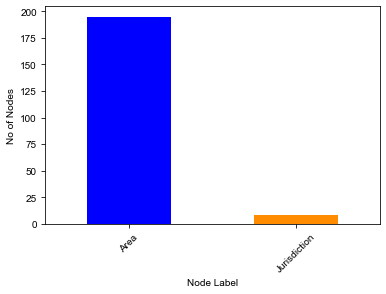

In [5]:
viz_1()

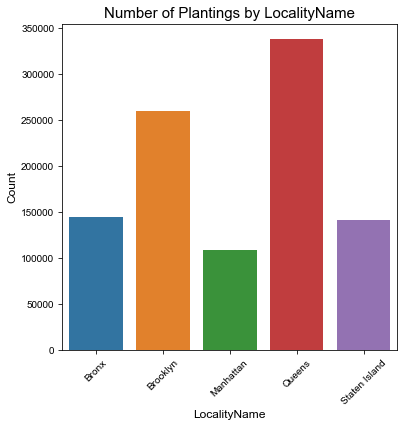

In [6]:
viz_2()

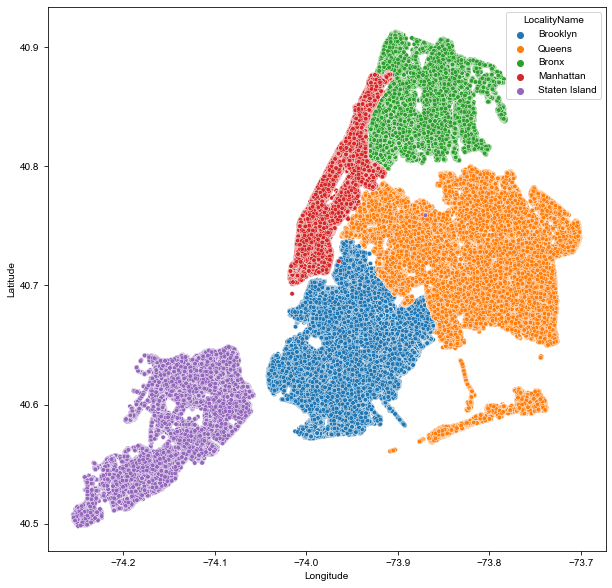

In [7]:
viz_3()

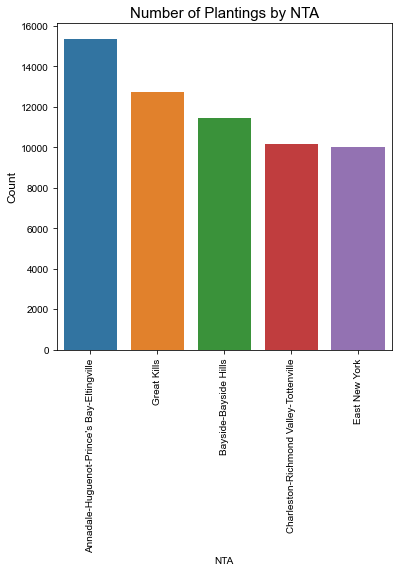

In [8]:
viz_4()

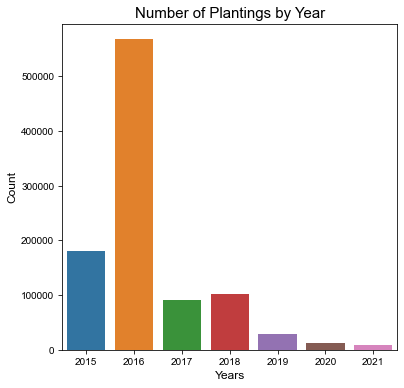

In [9]:
viz_5()

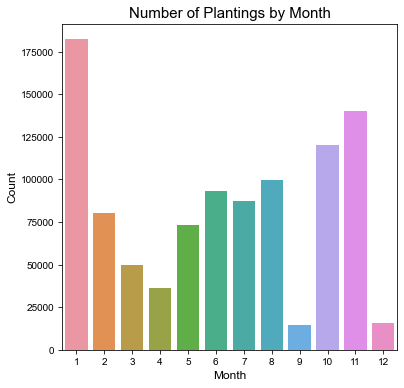

In [10]:
viz_6()

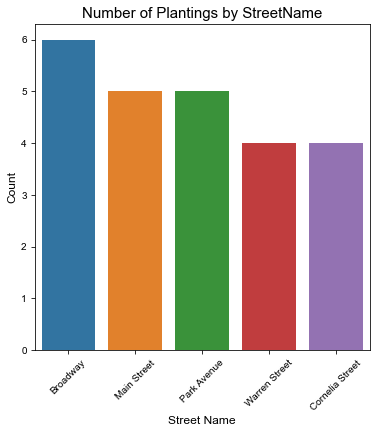

In [11]:
viz_7()

# Dashboard